# **Week 9: RNN GRU Seq2seq**

![picture](https://drive.google.com/uc?id=1Ren0qgAnsDGkgN_cnfCcE66GZAZfhMAp)



## **1.  RNN and GRU.**
1-1. RNN : Recurrent Neural Network <br> 
1-2. GRU : Gated Recurrent Units <br>
1-3. Padding


## **2.  Seq2seq model with attention.**
2-1. Encoder <br>
2-2. Decoder with Attention <br>
2-3. Training <br>
2-4. Evaluation <br>


reference  
https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html \
https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948

## **1. Implement RNN and GRU**


### **0) Import required packages**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### **1) Recurrent Neural Network (RNN)**

In PyTorch, RNN layer is given with the pytorch `torch.nn.RNN` package. In this section, we will learn basic usage of pytorch RNN layer with some example codes and practices.

**PARAMETERS**

*   **input_size**: the number of expected features in the input x 
*   **hidden_size**: the number of features in the hidden state h
*   **num_layers**: number of recurrent layers
*   **bidirectional**: if `True`, becomes bidirectional RNN
*   **batch_first**: if `True`, the input and output tensors are provided as `(batch, seq, feature)`


**INPUT**
*    **input**: data of shape (batch_size, seq_len, input_size) if **batch_first** = `True`
*    **h0**: tensor containing the initial hidden state of shape (num_layers * num_directions, batch_size, hidden_size) 


**OUTPUT**
*    **output**: tensor containing the output features from the last layer of the RNN, for each t provided as `(batch, seq, hidden_size)` if **batch_first** = `True`
*    **hidden**: tensor containing the hidden state for the last time step, provided as `(batch, num_layers * num_directionals, hidden_size)` if **batch_first** = `True`



Detailed explanation and default values are available on the official site
(https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)

In [ ]:
## RNN with 1 layer
# input_size = 3
# seq_len = 5
# hidden_size = 4

x = torch.randn(1, 5, 3)   # batch_size, seq_len, feature
h0 = torch.randn(1, 1, 4)  # num_layers * num_directions, batch_size, hidden_size 
rnn1 = nn.RNN(input_size = 3, hidden_size = 4, num_layers = 1, bidirectional = False, batch_first = True)
output, hidden = rnn1(x, h0)

print('RNN with 1 layer')
print('output shape:', output.shape)
print('output:', output.data)
print('hidden shape:', hidden.shape)
print('hidden:', hidden.data)

RNN with 1 layer
output shape: torch.Size([1, 5, 4])
output: tensor([[[ 0.6963, -0.0512, -0.4407,  0.9223],
         [-0.6786,  0.9739,  0.4928, -0.4733],
         [-0.6297,  0.0574,  0.5225, -0.8065],
         [-0.7897,  0.5716,  0.7395, -0.9589],
         [ 0.4440, -0.7311, -0.0491, -0.0063]]])
hidden shape: torch.Size([1, 1, 4])
hidden: tensor([[[ 0.4440, -0.7311, -0.0491, -0.0063]]])


In [ ]:
## RNN with 2 layers
# input_size = 3
# seq_len = 5
# hidden_size = 4

x = torch.randn(1, 5, 3)   # batch_size, seq_len, feature
h0 = torch.randn(2, 1, 4) # num_layers * num_directions, batch_size, hidden_size 
rnn2 = nn.RNN(input_size=3, hidden_size=4, num_layers=2, bidirectional = False, batch_first=True)
output, hidden = rnn2(x, h0)
print('RNN with 2 layers')
print('output shape:', output.shape)
print('output:', output.data)
print('hidden shape:', hidden.shape)
print('hidden:', hidden.data)

RNN with 2 layers
output shape: torch.Size([1, 5, 4])
output: tensor([[[-0.7228,  0.7957, -0.9183, -0.9370],
         [ 0.4647, -0.3493,  0.2660,  0.0836],
         [-0.3357,  0.4659, -0.6175, -0.7520],
         [ 0.3735, -0.3953, -0.2408,  0.0503],
         [-0.0435,  0.1092, -0.6741, -0.6447]]])
hidden shape: torch.Size([2, 1, 4])
hidden: tensor([[[ 0.5244,  0.0983,  0.5765,  0.5691]],

        [[-0.0435,  0.1092, -0.6741, -0.6447]]])


In [ ]:
## Bidirectional RNN
# input_size = 3
# seq_len = 5
# hidden_size = 4

x = torch.randn(1, 5, 3)   # batch_size, seq_len, feature
h0 = torch.randn(2, 1, 4) # num_layers * num_directions, batch_size, hidden_size 
rnn3 = nn.RNN(input_size=3, hidden_size=4, num_layers=1, bidirectional=True, batch_first=True)
output, hidden = rnn3(x, h0)
print('Bidirectional RNN')
print('output shape:', output.shape)
print('output:', output.data)
print('hidden shape:', hidden.shape)
print('hidden:', hidden.data)

Bidirectional RNN
output shape: torch.Size([1, 5, 8])
output: tensor([[[ 0.8405, -0.1036, -0.9202,  0.8449,  0.0379,  0.7915, -0.7615,
          -0.3680],
         [ 0.8293,  0.1509, -0.7561,  0.6954, -0.9408, -0.1371, -0.6064,
          -0.4441],
         [ 0.5253, -0.0245, -0.0264,  0.4554, -0.8105, -0.7701,  0.6103,
          -0.3961],
         [ 0.3119, -0.1685, -0.1027,  0.0093,  0.2870,  0.2656,  0.1120,
           0.2710],
         [ 0.7055,  0.3128, -0.5860,  0.2604, -0.5249,  0.2912, -0.5967,
           0.3245]]])
hidden shape: torch.Size([2, 1, 4])
hidden: tensor([[[ 0.7055,  0.3128, -0.5860,  0.2604]],

        [[ 0.0379,  0.7915, -0.7615, -0.3680]]])


In [ ]:
###########################################################################################################
###TO-DO: Make your own RNN!                                   
###Here, you can make your own RNN changing the dimensions, number of layers, bidirectional etc.


class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, num_layers, bidirectional):
    super().__init__()
    self.input_size, self.hidden_size, self.output_size = input_size, hidden_size, output_size
    self.num_layers = num_layers
    self.num_directions = 2 if bidirectional else 1

    self.rnn = nn.RNN(input_size=self.input_size, hidden_size = self.hidden_size, num_layers=self.num_layers, bidirectional=bidirectional, batch_first=True)
    self.output_fc = nn.Linear(self.hidden_size * self.num_directions, output_size)

  def forward(self, x):
    self.batch_size = x.size(0)
    h0 = self.init_hidden()
    output, hidden = self.rnn(x, h0)
    output = self.output_fc(output[:, -1, :])
    return output

  def init_hidden(self):
    return torch.zeros(self.num_layers * self.num_directions, self.batch_size, self.hidden_size)

In [ ]:
## Run your own RNN!
input_size = 3 ; hidden_size = 4; output_size = 2
num_layers = 1
bidirectional = True

x = torch.randn(1, 4, input_size)   # batch_size, seq_len, input_size

rnn = RNN(input_size, hidden_size, output_size, num_layers, bidirectional)
output = rnn(x)

print('output shape:', output.shape)
print('output: ', output.data)

output shape: torch.Size([1, 2])
output:  tensor([[0.6240, 0.1667]])


### **2) Gated Recurrent Unit (GRU)**

In PyTorch, GRU layer is given with the pytorch `torch.nn.GRU` package. In this section, we will learn basic usage of pytorch GRU layer with some example codes and practices.

**PARAMETERS**

*   **input_size**: the number of expected features in the input x 
*   **hidden_size**: the number of features in the hidden state h
*   **num_layers**: number of recurrent layers
*   **bidirectional**: if `True`, becomes bidirectional RNN
*   **batch_first**: if `True`, then the input and output tensors are provided as `(batch, seq, feature)`

**INPUT**
*    **input**: data of shape (batch_size, seq_len, input_size) if **batch_first** = `True`
*    **h0**: tensor containing the initial hidden state of shape (num_layers * num_directions, batch_size, hidden_size)


**OUTPUT**
*    **output**: tensor containing the output features from the last layer of the RNN, for each t provided as `(batch, seq, hidden_size)` if **batch_first** = `True`
*    **hidden**: tensor containing the hidden state for the last time step, provided as `(batch_size, num_layers * num_directionals, hidden_size)` if **batch_first** = `True`



Detailed explanation and default values are available on the official site
(https://pytorch.org/docs/stable/generated/torch.nn.GRU.html)

In [ ]:
# GRU with 1 layer
# input_size = 3
# seq_len = 5
# hidden_size = 4

x = torch.randn(1, 5, 3)   # batch_size, seq_len, feature
h0 = torch.randn(1, 1, 4)  # num_layers * num_directions, batch_size, hidden_size 
gru1 = nn.GRU(input_size = 3, hidden_size = 4, num_layers = 1, bidirectional = False, batch_first = True)
output, hidden = gru1(x, h0)

print('GRU with 1 layer')
print('output shape:', output.shape)
print('output:', output.data)
print('hidden shape:', hidden.shape)
print('hidden:', hidden.data)

GRU with 1 layer
output shape: torch.Size([1, 5, 4])
output: tensor([[[ 0.0587,  1.0543, -0.3735,  0.3746],
         [ 0.1207,  0.3154, -0.1672,  0.1440],
         [ 0.0969,  0.1405, -0.2413, -0.1242],
         [ 0.3217,  0.0112, -0.2988, -0.2700],
         [ 0.3052,  0.0224, -0.3105, -0.3897]]])
hidden shape: torch.Size([1, 1, 4])
hidden: tensor([[[ 0.3052,  0.0224, -0.3105, -0.3897]]])


In [ ]:
# GRU with 2 layer
# input_size = 3
# seq_len = 5
# hidden_size = 4

x = torch.randn(1, 5, 3)   # batch_size, seq_len, feature
h0 = torch.randn(2, 1, 4) # num_layers * num_directions, batch_size, hidden_size 
gru2 = nn.GRU(input_size=3, hidden_size=4, num_layers=2, bidirectional = False, batch_first=True)
output, hidden = gru2(x, h0)
print('GRU with 2 layers')
print('output shape:', output.shape)
print('output:', output.data)
print('hidden shape:', hidden.shape)
print('hidden:', hidden.data)
print()

GRU with 2 layers
output shape: torch.Size([1, 5, 4])
output: tensor([[[-0.2741, -0.2048, -0.0940,  0.0379],
         [ 0.0966, -0.3489, -0.0112,  0.1934],
         [ 0.3210, -0.4924,  0.0535,  0.2722],
         [ 0.4047, -0.5979,  0.1049,  0.3117],
         [ 0.4440, -0.6389,  0.1238,  0.3808]]])
hidden shape: torch.Size([2, 1, 4])
hidden: tensor([[[ 0.0948, -0.6233, -0.6097, -0.2043]],

        [[ 0.4440, -0.6389,  0.1238,  0.3808]]])



In [ ]:
# bidirectional GRU
# input_size = 3
# seq_len = 5
# hidden_size = 4

x = torch.randn(1, 5, 3)   # batch_size, seq_len, feature
h0 = torch.randn(2, 1, 4) # num_layers * num_directions, batch_size, hidden_size 
gru3 = nn.GRU(input_size=3, hidden_size=4, num_layers=1, bidirectional=True, batch_first=True)
output, hidden = gru3(x, h0)
print('Bidirectional GRU')
print('output shape:', output.shape)
print('output:', output.data)
print('hidden shape:', hidden.shape)
print('hidden:', hidden.data)

Bidirectional GRU
output shape: torch.Size([1, 5, 8])
output: tensor([[[ 0.2370, -0.7007,  0.4917, -0.7517,  0.5336, -0.0869, -0.3030,
          -0.2606],
         [ 0.1513, -0.4902,  0.4633, -0.4466,  0.4128, -0.2934, -0.0653,
           0.0174],
         [-0.1124, -0.2278,  0.5438, -0.4794,  0.3767, -0.4106,  0.2661,
           0.0788],
         [ 0.2583,  0.0867,  0.3620, -0.3624,  0.4182, -0.2519,  0.1557,
          -0.4203],
         [ 0.1743, -0.2925,  0.2746,  0.0668,  0.3999, -0.2109, -0.2320,
          -0.6795]]])
hidden shape: torch.Size([2, 1, 4])
hidden: tensor([[[ 0.1743, -0.2925,  0.2746,  0.0668]],

        [[ 0.5336, -0.0869, -0.3030, -0.2606]]])


In [ ]:
################################################################
### TODO: Make your own GRU!  
### Here, you can make your own GRU changing the dimensions, number of layers, bidirectional etc. 

class GRU(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, num_layers, bidirectional):
    super().__init__()
    self.input_size, self.hidden_size, self.output_size = input_size, hidden_size, output_size
    self.num_layers = num_layers
    self.num_directions = 2 if bidirectional else 1

    self.gru = nn.GRU(input_size=self.input_size, hidden_size = self.hidden_size, num_layers=self.num_layers, bidirectional=bidirectional, batch_first=True)
    self.output_fc = nn.Linear(self.hidden_size * self.num_directions, output_size)

  def forward(self, x):
    self.batch_size = x.size(0)
    h0 = self.init_hidden()
    output, hidden = self.gru(x, h0)
    output = self.output_fc(output[:, -1, :])
    return output

  def init_hidden(self):
    return torch.zeros(self.num_layers * self.num_directions, self.batch_size, self.hidden_size)

In [ ]:
## Run your own GRU!
input_size = 3 ; hidden_size = 4; output_size = 2
num_layers = 1
bidirectional = True

x = torch.randn(1, 4, input_size)   # batch_size, seq_len, input_size

gru = GRU(input_size, hidden_size, output_size, num_layers, bidirectional)
output = gru(x)

print('output shape:', output.shape)
print('output: ', output.data)

output shape: torch.Size([1, 2])
output:  tensor([[-0.1937,  0.3783]])


### **3) Padding**

We can make better use of the GPU by training on batches of many sequences at once, but doing so brings up the question of **how to deal with sequences of varying lengths**. The simple solution is to **"pad"** the shorter sentences with some padding symbol (in this case 0).

In [ ]:
from string import punctuation
from collections import Counter
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

import random

In [ ]:
!wget https://www.dropbox.com/s/oyaa5mbla6ubsnq/reviews.txt
!wget https://www.dropbox.com/s/zlg9mdukkwo241j/labels.txt

--2020-11-05 00:35:42--  https://www.dropbox.com/s/oyaa5mbla6ubsnq/reviews.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.1, 2620:100:6019:1::a27d:401
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/oyaa5mbla6ubsnq/reviews.txt [following]
--2020-11-05 00:35:42--  https://www.dropbox.com/s/raw/oyaa5mbla6ubsnq/reviews.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccff917cfa5f853e00a5f0dbaab.dl.dropboxusercontent.com/cd/0/inline/BCnvIZEzmlFFph2MtcE7abRTUUmYhbixZmAm3KiGVxjwHkwSmRd5qi-vm5sKsha7PB2D2YkI3TBLwUi2VOF-5HFC-5ZG6fICwWwysxBH7cjKLtt8BV_Frx8AcJ8BEQP1fFc/file# [following]
--2020-11-05 00:35:42--  https://uccff917cfa5f853e00a5f0dbaab.dl.dropboxusercontent.com/cd/0/inline/BCnvIZEzmlFFph2MtcE7abRTUUmYhbixZmAm3KiGVxjwHkwSmRd5qi-vm5sKsha7PB2D2YkI3TBLwUi2VOF-5HFC-5ZG6fICwWwysxBH7cjKLtt8BV_Fr

In [ ]:
with open ('reviews.txt', 'r') as f:
  reviews = f.read()
with open('labels.txt', 'r') as f:
  labels = f.read()

print(reviews[:50])
print()
print(labels[:26])

The characters are unlikeable and the script is aw

negative
negative
negative


### **0) Preprocessing**

In [ ]:
# lower case
reviews = reviews.lower()

# remove punctuation
all_text = ''.join([c for c in reviews if c not in punctuation])

# create list of reviews
reviews_split = all_text.split('\n')
labels_split = labels.split('\n')
print ('Number of reviews :', len(reviews_split))

## tokenize - create vocab to int mapping dictionary
all_text2 = ' '.join(reviews_split)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)
print("count_words")
print(count_words)
print()

# make vocab2int
#There is a small trick here, in this mapping index will start from 0 
#i.e. mapping of ‘the’ will be 0. But later on we are going to do padding for shorter reviews and conventional choice for padding is 0. So we need to start this indexing from 1
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}     
print("vocab_to_int")
print(vocab_to_int)

Number of reviews : 500
count_words
Counter({'the': 996, 'a': 637, 'this': 547, 'and': 502, 'it': 491, 'i': 460, 'is': 446, 'of': 429, 'movie': 411, 'to': 379, 'was': 239, 'in': 236, 'that': 180, 'film': 166, 'you': 161, 'but': 155, 'one': 144, 'for': 140, 'not': 139, 'with': 136, 'br': 135, 'its': 127, 'on': 121, 'bad': 117, 'good': 112, 'as': 109, 'have': 109, 'be': 97, 'are': 92, 'great': 90, 'so': 85, 'if': 85, 'at': 84, 'like': 84, 'my': 83, 'all': 81, 'very': 80, 'see': 79, 'just': 79, 'an': 79, 'time': 76, 'from': 73, 'acting': 68, 'by': 65, 'ever': 65, 'seen': 65, 'movies': 63, 'dont': 63, 'watch': 61, 'what': 60, 'story': 60, 'me': 59, 'has': 58, 'really': 57, 'plot': 56, 'no': 56, 'some': 55, 'worst': 54, 'about': 54, 'out': 53, 'there': 52, 'only': 51, 'even': 51, 'will': 51, 'they': 49, 'too': 48, 'more': 46, 'when': 44, 'love': 44, 'much': 43, 'or': 43, 'can': 42, 'who': 42, 'he': 42, 'made': 40, 'his': 39, 'best': 38, 'had': 38, 'would': 38, 'were': 38, 'think': 37, 'up':

In [ ]:
encoded_labels = [1 if label =='positive' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)

In [ ]:
# Change input to index
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
  
print (reviews_int[0:3])

[[1, 118, 29, 1420, 4, 1, 102, 7, 186, 22, 2, 91, 8, 1, 865, 8, 1421, 4, 1422], [1, 92, 276, 8, 866, 20, 325, 1423, 4, 1424, 1425, 325, 7, 17, 8, 1, 77, 9, 18, 1426, 3, 17, 7, 2, 37, 24, 373, 1, 374, 7, 62, 12, 1, 648, 12, 1, 92, 17, 1, 25, 17, 11, 1427, 148, 22, 295, 6, 867, 10, 49, 1, 92, 866], [6, 326, 96, 3, 14, 12, 1, 868, 26, 2, 869, 16, 6, 511, 10, 38, 5, 109, 97, 1428, 1429, 7, 194, 1430, 2, 1431, 26, 2, 296, 195, 50, 1, 426, 11, 246, 23, 12, 1, 868, 3, 7, 2, 54, 24, 14, 20, 24, 427, 4, 24, 119, 210, 2, 91, 8, 138]]


In [ ]:
## Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
def pad_features(reviews_int, seq_length):

    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [ ]:
from torch.nn.utils.rnn import pad_sequence

example_reviews = []
for i in range(len(reviews_int)):
  example_reviews.append(torch.Tensor(reviews_int[i]))

example_padded = pad_sequence(example_reviews, batch_first=True)

In [ ]:
seq_length = 200
indexed_reviews = pad_features(reviews_int, seq_length)

In [ ]:
# Dataloader
# create Tensor Dataset

split_frac = 0.8
train_x = indexed_reviews[0:int(split_frac * len(indexed_reviews))]
train_y = encoded_labels[0:int(split_frac * len(indexed_reviews))]

test_x = indexed_reviews[int(split_frac * len(indexed_reviews)):]
test_y = encoded_labels[int(split_frac * len(indexed_reviews)):]

train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

batch_size = 50
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
# Check the data
samp_dataiter = iter(train_loader)
sample_x, sample_y = samp_dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[   0,    0,    0,  ...,   11,   45,   75],
        [   0,    0,    0,  ...,  540,    5,   13],
        [   0,    0,    0,  ..., 3060,   94,   46],
        ...,
        [   0,    0,    0,  ...,   18,   35,  427],
        [   0,    0,    0,  ...,  902,   60, 2325],
        [   0,    0,    0,  ...,    6, 3052, 3053]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 1])


In [ ]:
# Sentiment LSTM
class SentimentLSTM(nn.Module):
  def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers):
    super().__init__()

    self.output_size = output_size
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim

    self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = 0)
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, batch_first = True)

    self.output_fc = nn.Linear(hidden_dim, output_size)
    self.sig = nn.Sigmoid()

  def forward(self, x):
    self.batch_size = x.size(0)
    embeds = self.embedding(x)
    h0, c0 = self.init_hidden()

    output, hidden = self.lstm(embeds, (h0, c0))
    output = self.output_fc(output[:, -1, :])
    output = self.sig(output)
    return output

  def init_hidden(self):
    h0 = torch.zeros(self.n_layers, self.batch_size, self.hidden_dim)
    c0 = torch.zeros(self.n_layers, self.batch_size, self.hidden_dim)
    return h0, c0

In [ ]:
# Let's train our model
vocab_size = len(vocab_to_int) + 1   # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 1

sentiment_net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

lr = 0.01
n_epochs = 20
counter = 0

criterion = nn.BCELoss()
opt = torch.optim.Adam(sentiment_net.parameters(), lr=lr)

for epoch in range(n_epochs + 1):
  for inputs, labels in train_loader:
    counter += 1
    output = sentiment_net(inputs)
    pred = (output.squeeze() > 0.5).float()
    acc = torch.mean((pred == labels).float())

    loss = criterion(output.squeeze(), labels.float())

    opt.zero_grad()
    loss.backward()
    opt.step()
  
  sentiment_net.eval()
  test_losses = []
  test_acc = []

  for inputs, labels in test_loader:
    output = sentiment_net(inputs)
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    pred = (output.squeeze() > 0.5).float()
    acc = torch.mean((pred == labels).float())
    test_acc.append(acc.item())

  sentiment_net.train()
  print("Epoch: {}/{} ".format(epoch, n_epochs),
        "Step: {} ".format(counter),
        "Loss: {:.6f} ".format(loss.item()),
        "Acc: {:.6f} ".format(acc.item()),
        "Test Loss: {:.6f} ".format(np.mean(test_losses)),
        "Test Acc: {:.6f} ".format(np.mean(test_acc)))

Epoch: 0/20  Step: 8  Loss: 0.653645  Acc: 0.100000  Test Loss: 0.937293  Test Acc: 0.110000 
Epoch: 1/20  Step: 16  Loss: 0.321394  Acc: 0.100000  Test Loss: 1.926727  Test Acc: 0.110000 
Epoch: 2/20  Step: 24  Loss: 0.122002  Acc: 0.260000  Test Loss: 2.531454  Test Acc: 0.250000 
Epoch: 3/20  Step: 32  Loss: 0.009534  Acc: 0.240000  Test Loss: 3.532230  Test Acc: 0.250000 
Epoch: 4/20  Step: 40  Loss: 0.008333  Acc: 0.240000  Test Loss: 4.509937  Test Acc: 0.240000 
Epoch: 5/20  Step: 48  Loss: 0.000630  Acc: 0.240000  Test Loss: 4.709353  Test Acc: 0.250000 
Epoch: 6/20  Step: 56  Loss: 0.001013  Acc: 0.300000  Test Loss: 4.690176  Test Acc: 0.280000 
Epoch: 7/20  Step: 64  Loss: 0.000325  Acc: 0.320000  Test Loss: 4.802266  Test Acc: 0.280000 
Epoch: 8/20  Step: 72  Loss: 0.000485  Acc: 0.240000  Test Loss: 4.981619  Test Acc: 0.270000 
Epoch: 9/20  Step: 80  Loss: 0.000332  Acc: 0.360000  Test Loss: 5.156383  Test Acc: 0.270000 
Epoch: 10/20  Step: 88  Loss: 0.000094  Acc: 0.2800

In [ ]:
# Evaluation 
sentiment_net.eval()

random.seed(1234)

def get_key(val, my_dict):
  for key, value in my_dict.items():
    if val == value:
      return key

review, label = random.choice(train_data)
review_sentence = [get_key(rev, vocab_to_int) for rev in review]
print("input sentence: ", list(filter(None, review_sentence)))

output = sentiment_net(review.unsqueeze(0))   # additional dimension for batch
sentiment = 'negative' if output <= 0.5 else 'positive'
print('sentiment:', sentiment)

print('============================================================================')

random.seed(7532)

review, label = random.choice(train_data)
review_sentence = [get_key(rev, vocab_to_int) for rev in review]
print("input sentence: ", list(filter(None, review_sentence)))

output = sentiment_net(review.unsqueeze(0))   # additional dimension for batch
sentiment = 'negative' if output <= 0.5 else 'positive'
print('sentiment:', sentiment)

input sentence:  ['i', 'admit', 'its', 'very', 'silly', 'but', 'ive', 'practically', 'memorized', 'the', 'damn', 'thing', 'it', 'holds', 'a', 'lot', 'of', 'good', 'childhood', 'memories', 'for', 'me', 'my', 'brother', 'and', 'i', 'saw', 'it', 'opening', 'day', 'and', 'i', 'have', 'respect', 'for', 'any', 'movie', 'with', 'fnm', 'on', 'the', 'soundtrack']
sentiment: positive
input sentence:  ['this', 'piece', 'aint', 'really', 'worth', 'a', 'comment', 'its', 'simply', 'the', 'worst', 'horror', 'movie', 'i', 'have', 'ever', 'seen', 'the', 'actors', 'are', 'bad', 'as', 'bad', 'can', 'be', 'and', 'the', 'whole', 'plot', 'is', 'so', 'silly', 'it', 'nearly', 'made', 'me', 'cry', 'shame', 'on', 'you', 'i', 'say']
sentiment: negative


### **2. Seq2seq model with attention**
Here, you are going to translate French to English using seq2seq model. 

*    Encoder : GRU
*    Decoder : GRU with attention

### **0) Preprocessing**

In [1]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random
import numpy as np

from nltk.translate.bleu_score import sentence_bleu

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
%matplotlib inline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import warnings
warnings.filterwarnings('ignore')

In [4]:
!wget https://www.dropbox.com/s/b4nrxhsbny99vel/eng-fra.txt

--2020-11-08 00:57:50--  https://www.dropbox.com/s/b4nrxhsbny99vel/eng-fra.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/b4nrxhsbny99vel/eng-fra.txt [following]
--2020-11-08 00:57:50--  https://www.dropbox.com/s/raw/b4nrxhsbny99vel/eng-fra.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucad0b4ea616f898de5759cd098f.dl.dropboxusercontent.com/cd/0/inline/BCx7p3MftqkYy-SiAAdWhcLmvt4c_Uf75cBbpsehhELHgVyq4WyyyHssOvN0Qo5YBOBqXeGiQ_yB8NmUBA1xfo7DEq5NbS5iS-Q6xMEowmx3672M9IOv894sgnLDzAP9voE/file# [following]
--2020-11-08 00:57:50--  https://ucad0b4ea616f898de5759cd098f.dl.dropboxusercontent.com/cd/0/inline/BCx7p3MftqkYy-SiAAdWhcLmvt4c_Uf75cBbpsehhELHgVyq4WyyyHssOvN0Qo5YBOBqXeGiQ_yB8NmUBA1xfo7DEq5NbS5iS-Q6xMEowmx3672M9IOv8

We will need a unique index per word to use as the inputs and targets of the networks. To keep track of all this, we will use a class called `Lang` which has word -> index (`word2index`) and index -> word (`index2word`) dictionaries, as well as a count of each word word2count to use to later replace rare words.  

In [5]:
SOS_token = 0
EOS_token = 1

# Since there is a lot of example sentences and we want to train quickly, we will trim the data set to only relatively short and simple sentences.
# Here, the maximum length is 10 words (including ending punctuation)
# We are filtering to sentences that translate to the form "I am" or "He is" etc
MAX_LENGTH = 10

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)

# The full process for preparing the data is:
#     - Read text file and split into lines, split lines into pairs
#     - Normalize text, filter by length and content
#     - Make word lists from sentences in pairs

# Tokenizer
# We’ll need a unique index per word to use as the inputs and targets of the networks later.
class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1



# Turn a Unicode string to plain ASCII
# The file are all in Unicode, to simplify we will turn Unicode characters to ASCII, make everything lowercase, and trim most punctuation.
# For more information, refer https://stackoverflow.com/a/518232/2809427

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )


# Lowercase, trim, and remove non-letter characters

def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s



# Read file
# If you want to translate Other Language -> English, then set `reverse = True`
def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    lines = open('./%s-%s.txt' % (lang1, lang2), encoding='utf-8').\
        read().strip().split('\n')

    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs


def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]


def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


input_lang, output_lang, pairs = prepareData('eng', 'fra', True)
print(random.choice(pairs))

Reading lines...
Read 135842 sentence pairs
Trimmed to 10599 sentence pairs
Counting words...
Counted words:
fra 4345
eng 2803
['je passe une audition pour le role .', 'i m auditioning for the part .']


### **1) Encoder**

The encoder of a seq2seq network is a GRU that outpus some value for **every word** from the input sentence. For every input word, the encoder outputs a vector and a hidden state, and uses the hidden state for the next input word.

In [6]:
class Encoder(nn.Module):
  def __init__(self, input_size, hidden_size):
    super().__init__()
    self.hidden_size = hidden_size

    self.embedding = nn.Embedding(input_size, hidden_size)
    self.gru = nn.GRU(hidden_size, hidden_size)

  def forward(self, x, hidden):
    embedded = self.embedding(x).view(1, 1, -1)
    output, hidden = self.gru(embedded, hidden)
    return output, hidden
  
  def initHidden(self):
    return torch.zeros(1, 1, self.hidden_size, device = device)

### **2) Decoder**

The decoder is another GRU that takes the output vector(s) and outputs a sequence of words to create the translation. Here, we are going to use **Attention Decoder**

In [7]:
class AttnDecoder(nn.Module):
  def __init__(self, hidden_size, output_size, max_length=MAX_LENGTH):
    super().__init__()
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.max_length = max_length

    self.embedding = nn.Embedding(self.output_size, self.hidden_size)
    self.attn_matrix = nn.Parameter(data = torch.ones((self.hidden_size, self.hidden_size)), requires_grad = True)
    self.gru = nn.GRU(self.hidden_size * 2, self.hidden_size)
    self.out = nn.Linear(self.hidden_size, self.output_size)

  def forward(self, x, hidden, encoder_outputs):
    embedded = self.embedding(x).view(1, 1, -1)

    attn_weights = torch.matmul(torch.matmul(hidden[0], self.attn_matrix), torch.transpose(encoder_outputs, 0, 1))  # 1 x max_length
    attn_weights = F.softmax(attn_weights, dim=1)

    attn_applied = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs.view(1, -1, self.hidden_size))

    input_gru = torch.cat((attn_applied[0], embedded[0]), dim=1)

    output, hidden = self.gru(input_gru.unsqueeze(0), hidden)
    output = F.log_softmax(self.out(output[0]), dim=1)

    return output, hidden, attn_weights

  def initHidden(self):
    return torch.zeros(1, 1, self.hidden_size, device=device)

### **3) Train our model**

#### Preparing Training Data

To train, for each pair we will need an input tensor (indexes of the words in the input sentence) and target tensor (indexes of the words in the target sentence). While creating these vectors we will append the EOS token to both sequences.

In [8]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

#### **BLEU(Bilingual Evaluation Understudy) score**

Like FID score you are already familiar with, there is a metric called **BLEU score** in NLP. BLEU score is a metric for evaluating a generated sentence to a reference sentence. </br>

BLEU score is calculated by comparing n-gram matches between each candidate translation to the reference translations. BLEU compares the n-gram of the candidate translation with n-gram of the reference translation to count the number of matches. These matches are independent of the positions where they occur.


NLTK provides the `sentence_bleu()` function for evaluating a candidate sentence against one or more reference sentences.


For more information about BLEU, please refer these websites:  
https://donghwa-kim.github.io/BLEU.html  
https://wikidocs.net/31695  
https://machinelearningmastery.com/calculate-bleu-score-for-text-python/  
https://towardsdatascience.com/bleu-bilingual-evaluation-understudy-2b4eab9bcfd1


In [17]:
hidden_size = 256
teacher_forcing_ratio = 0.5
max_length = MAX_LENGTH
n_iters = 75000   # Change this! (maybe 75000?)
n_epochs = 4
lr = 0.001

encoder = Encoder(input_size = input_lang.n_words, hidden_size = hidden_size).to(device)
decoder = AttnDecoder(hidden_size=hidden_size, output_size=output_lang.n_words, max_length=max_length).to(device)

encoder_opt = optim.Adam(encoder.parameters(), lr=lr)
decoder_opt = optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.NLLLoss()

training_pairs = [tensorsFromPair(random.choice(pairs)) for i in range(n_iters)]

for epoch in range(n_epochs + 1): 
  for iter in range(1, n_iters + 1):
    
    training_pair = training_pairs[iter - 1]
    input_tensor = training_pair[0]
    target_tensor = training_pair[1]

    # Encoder
    encoder_hidden = encoder.initHidden()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)
  
    loss = 0

    for ei in range(input_length):
      encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
      encoder_outputs[ei] = encoder_output[0, 0]

    # Decoder
    output_sentence = [output_lang.index2word[t.item()] for t in target_tensor]

    decoder_input = torch.tensor([[SOS_token]], device=device)
    decoder_hidden = encoder_hidden

    # Teacher forcing: Feed the target as the next input
    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
  
    decoded_sentence = []
    if use_teacher_forcing:
      for di in range(target_length):
        decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
        topv, topi = decoder_output.topk(1)
        decoded_sentence.append(output_lang.index2word[topi.item()])

        loss += criterion(decoder_output, target_tensor[di])
        decoder_input = target_tensor[di]  # Teacher forcing
    
    else:
      for di in range(target_length):
        decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
        topv, topi = decoder_output.topk(1)   # value, indice
        decoded_sentence.append(output_lang.index2word[topi.item()])
        decoder_input = topi.squeeze().detach()   # detach from history as input

        loss += criterion(decoder_output, target_tensor[di])
        if decoder_input.item() == EOS_token:
          break

    
    encoder_opt.zero_grad()
    decoder_opt.zero_grad()

    loss.backward()

    encoder_opt.step()
    decoder_opt.step()

    # BLEU score
    bleu_score = sentence_bleu([output_sentence[:-1]], decoded_sentence[:-1])


    if iter % 5000 == 0:
      print('epoch: {}, iter: {}, loss: {:.6f},  bleu_score: {:.6f}'.format(epoch, iter, loss.item() / target_length, bleu_score))

epoch: 0, iter: 5000, loss: 1.851146,  bleu_score: 0.707107
epoch: 0, iter: 10000, loss: 1.383372,  bleu_score: 0.795271
epoch: 0, iter: 15000, loss: 1.901015,  bleu_score: 0.622333
epoch: 0, iter: 20000, loss: 3.681574,  bleu_score: 0.638943
epoch: 0, iter: 25000, loss: 1.488375,  bleu_score: 0.467138
epoch: 0, iter: 30000, loss: 3.974756,  bleu_score: 0.550695
epoch: 0, iter: 35000, loss: 1.279817,  bleu_score: 0.594604
epoch: 0, iter: 40000, loss: 0.147570,  bleu_score: 1.000000
epoch: 0, iter: 45000, loss: 2.008959,  bleu_score: 0.707107
epoch: 0, iter: 50000, loss: 0.243569,  bleu_score: 1.000000
epoch: 0, iter: 55000, loss: 0.357963,  bleu_score: 0.668740
epoch: 0, iter: 60000, loss: 3.946113,  bleu_score: 0.589957
epoch: 0, iter: 65000, loss: 0.365927,  bleu_score: 0.604275
epoch: 0, iter: 70000, loss: 0.508939,  bleu_score: 0.707107
epoch: 0, iter: 75000, loss: 1.468249,  bleu_score: 0.555524
epoch: 1, iter: 5000, loss: 0.857403,  bleu_score: 0.707107
epoch: 1, iter: 10000, los

KeyboardInterrupt: ignored

### **4) Evaluate our model**

Evaluation is mostly the same as training, but there are no targets so we simply feed the decoder's predictions back to itself for each step (**NO TEACHER FORCING**) Every time it predicts a word we add it to the output string, and if it predicts the EOS token we stop there. We also store the decoder’s attention outputs for display later.

In [18]:
## > input sentence
## = true output sentence
## < predicted sentence

def evaluate(encoder, decoder, sentence, output_sentence, max_length=max_length):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]

        output_tensor = tensorFromSentence(output_lang, output_sentence)
        output_sent = [output_lang.index2word[t.item()] for t in output_tensor]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        bleu_score = sentence_bleu([output_sent[:-1]], decoded_words[:-1])
        return decoded_words, decoder_attentions[:di + 1], bleu_score

def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions, bleu_score = evaluate(encoder, decoder, pair[0], pair[1])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('BLEU score: {:.6f}'.format(bleu_score))
        print('')

evaluateRandomly(encoder, decoder)

> je ne suis pas assez bon pour toi .
= i m not good enough for you .
< i m not good enough for you . <EOS>
BLEU score: 1.000000

> nous ne sommes pas tes parents .
= we re not your parents .
< we re not your parents . <EOS>
BLEU score: 1.000000

> je suis desolee ca ne se reproduira pas .
= i m sorry it won t happen again .
< i m sorry won won it won . <EOS>
BLEU score: 0.424567

> elle adore les gateaux .
= she is fond of cake .
< she s fond of my . <EOS>
BLEU score: 0.604275

> je suis ponctuelle .
= i m punctual .
< i m punctual . <EOS>
BLEU score: 1.000000

> je viens d angleterre .
= i am from england .
< i m from england . <EOS>
BLEU score: 0.604275

> elle peint sa chambre en blanc .
= she s painting her room white .
< she s painting her room white . <EOS>
BLEU score: 1.000000

> nous sommes de vieux amis .
= we re old friends .
< we re old friends . <EOS>
BLEU score: 1.000000

> nous sommes toujours prudentes .
= we re always careful .
< we re careful . <EOS>
BLEU score: 0.703

['you', 're', 'totally', 'right', 'right', '.', '<EOS>']


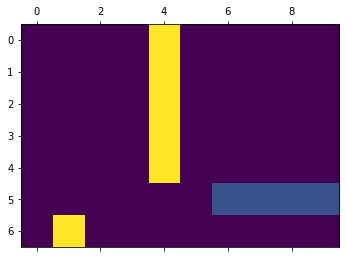

In [20]:
def evaluate_attn(encoder, decoder, sentence, max_length=max_length):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_sentence = [input_lang.index2word[t.item()] for t in input_tensor]
        input_length = input_tensor.size()[0]

        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

output_words, attentions = evaluate_attn(encoder, decoder, "tu as parfaitement raison .")
print(output_words)
plt.matshow(attentions.numpy())
plt.show()

input = elle a cinq ans de moins que moi .
output = she s six years older than me am . <EOS>


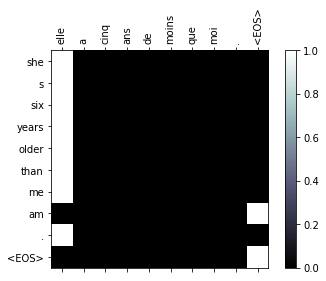


input = elle est trop petit .
output = she s too short . <EOS>


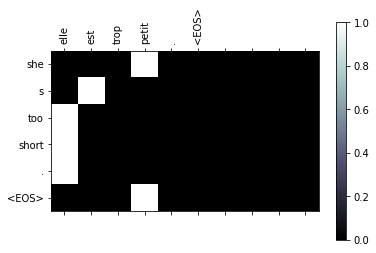


input = je ne crains pas de mourir .
output = i m not scared of dying . <EOS>


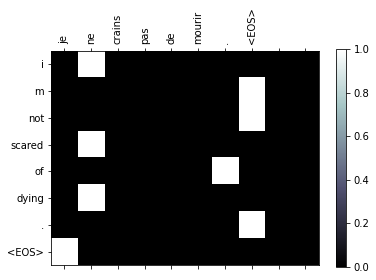


input = c est un jeune directeur plein de talent .
output = he s a talented young of <EOS>


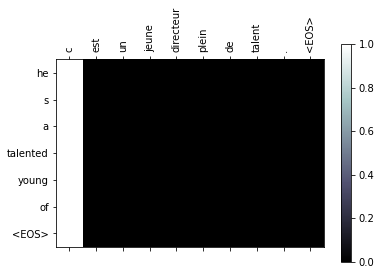

In [21]:
def showAttention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate_attn(
        encoder, decoder, input_sentence)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    showAttention(input_sentence, output_words, attentions)


evaluateAndShowAttention("elle a cinq ans de moins que moi .")

print()

evaluateAndShowAttention("elle est trop petit .")

print()

evaluateAndShowAttention("je ne crains pas de mourir .")

print()

evaluateAndShowAttention("c est un jeune directeur plein de talent .")



If you train your model more changing hyper parameters, you will get a decent result like below.

![picture](https://drive.google.com/uc?id=1cfGnVRdHeCHtLgvUwKo3xMxU5GJ-5fmx)